UTKFace Dataset 

- Contains **20,000**  
- Labels:  
  - **Age:** 0–116 years  
  - **Gender:** 0 = male, 1 = female  
  - **Ethnicity:** 5 classes (White, Black, Asian, Indian, Others)  
- Format: JPEG, aligned faces 


---
##  Run the code below to download.
If you did not download the dataset, you can download it from the source or download it via the 📖 **Reference:** [Hugging Face](https://huggingface.co/datasets/Subh775/UTKFace_demographics_V1) link.

In [ ]:
%pip install huggingface-hub

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached huggingface_hub-0.35.3-py3-none-any.whl.metadata (14 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl.metadata (2.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-win_amd64.whl.metadata (38 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
Using cached huggingface_hub-0.35.3-py3-none-any.whl (564 kB)
Using cached fsspec-2025.9.0-py3-none-any.whl (199 kB)
Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl (154 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached filelock-3.20.0-py3-none-any.whl (16 kB)
Using cached requests-2.32.5-py3-none-any


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from huggingface_hub import snapshot_download

# Download the full snapshot of the dataset repository from Hugging Face Hub
snapshot_download(
    repo_id="Subh775/UTKFace_demographics_V1",  # The dataset repository ID on Hugging Face
    repo_type="dataset",                        # Specify that the repo type is a dataset
    cache_dir="../dataset/"                     # Local directory where the dataset will be cached
)


C:\Users\LOTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 4 files: 100%|██████████| 4/4 [14:38<00:00, 219.56s/it]


'../dataset/datasets--Subh775--UTKFace_demographics_V1\\snapshots\\01fc0ca3fd293962454834c1e19c5266bc427674'

---
## Read dataset

In [79]:
import pandas as pd

# Base directory where the dataset files are stored
BASE_DIR="../dataset/datasets--Subh775--UTKFace_demographics_V1/snapshots/01fc0ca3fd293962454834c1e19c5266bc427674/data/"  # It may change depending on the directory.

# Read the first parquet shard
df1 = pd.read_parquet(f"{BASE_DIR}train-00000-of-00002.parquet")

# Read the second parquet shard
df2 = pd.read_parquet(f"{BASE_DIR}train-00001-of-00002.parquet")

# Concatenate both shards into a single DataFrame and reset the index
df = pd.concat([df1, df2], ignore_index=True)

# Display the first 5 rows of the combined DataFrame
print(df.head())


                                               image  age  gender  race
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  100       1     0
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  100       1     2
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  100       1     2
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  101       1     2
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   10       0     0


In [80]:
df.isnull().sum()

image     0
age       0
gender    0
race      0
dtype: int64

## Plot visualization

In [81]:
# Import the required tools
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io

In [82]:
GENDER_LABEL=['male','female']
RACE_LABEL = ['White','Black',"Asian","Indian","Others"]


# Create a copy of df for plotting
df_plot = df.copy()

### gender 
pie

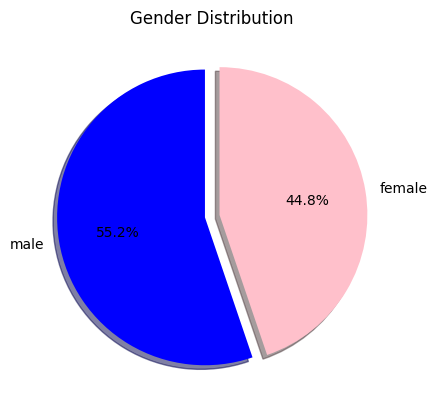

In [83]:
# Count the number of each gender
gender_counts = df_plot['gender'].value_counts()

# Plot pie chart
plt.pie(
    gender_counts.values,                      # values for each gender
    labels=GENDER_LABEL,               
    autopct='%1.1f%%',                         # show percentage
    startangle=90,                             # rotate start angle
    colors=['blue', 'pink'],                    # optional: color for each gender
    explode=(0.05,0.05),
    shadow=True)

plt.title("Gender Distribution")
plt.savefig("../plots/gender-distribution-pie.png")
plt.show()


### race 
pie, 
bar

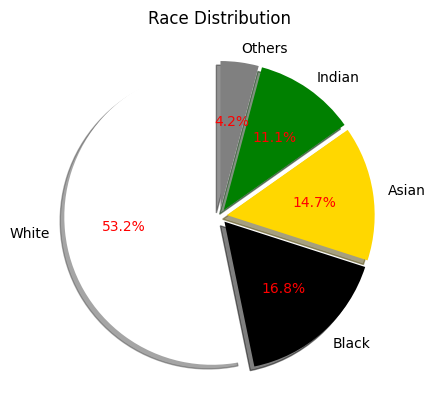

In [84]:
# Count the number of each race
race_counts = df_plot['race'].value_counts()
# Plot pie chart and capture returned texts
wedges, texts, autotexts = plt.pie(
    race_counts.values,
    labels=RACE_LABEL,
    autopct='%1.1f%%',
    startangle=90,
    colors=['white', 'black','gold',"green","gray"],
    explode=(0.05,0.05,0.05,0.05,0.05),
    shadow=True
)

# Change color of percentage texts
for autotext in autotexts:
    autotext.set_color("red")  #

plt.title("Race Distribution")
plt.savefig("../plots/race-distribution-pie.png")
plt.show()

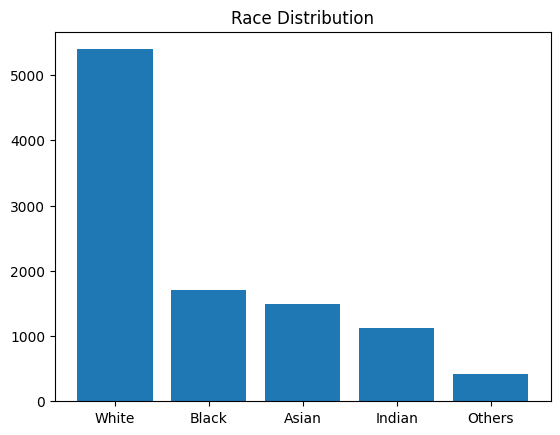

In [85]:
plt.bar(RACE_LABEL,race_counts.values)
plt.title("Race Distribution")
plt.savefig("../plots/race-distribution-bar.png")
plt.show()

## Race vs Gender Visualization
This section shows two different visualizations of the relationship between race and gender in the dataset:
1. A grouped bar chart to compare counts across categories.
2. A heatmap to highlight the distribution intensity.

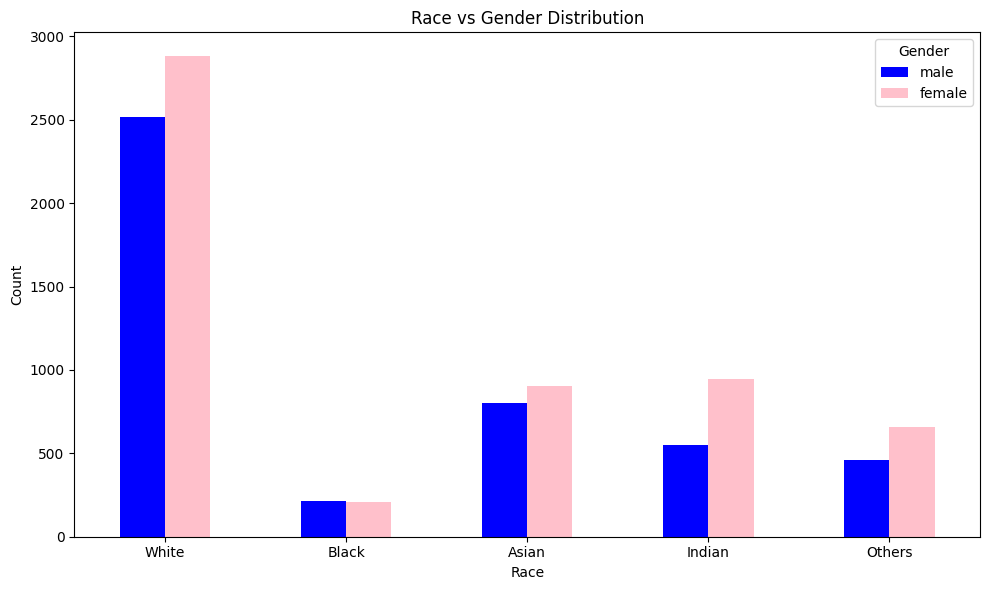

In [86]:
# Group the dataset by race and gender, then reshape with unstack
grouped = df_plot.groupby(['race', 'gender']).size().unstack()

# Plot grouped bar chart with separate colors for genders
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])

# Set legend title and replace numeric gender labels with male/female
ax.legend(title="Gender", labels=GENDER_LABEL)

# Replace numeric race codes on the x-axis with readable labels
ax.set_xticklabels(RACE_LABEL)

# Add chart title and axis labels
plt.title("Race vs Gender Distribution")
plt.xlabel("Race")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig("../plots/race-gender-distribution-bar.png")

# Display the chart
plt.show()


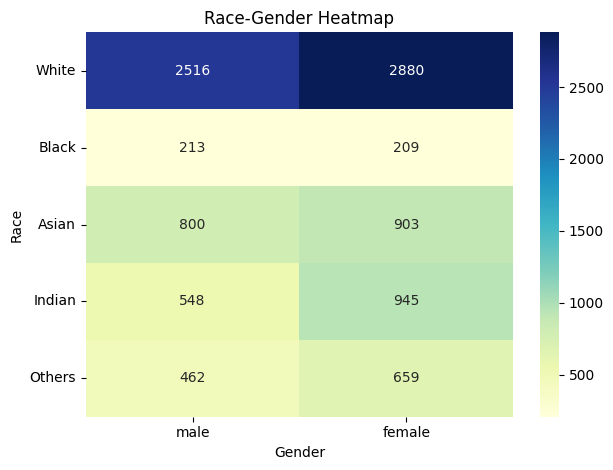

In [87]:
# Heatmap of race vs gender counts
ax = sns.heatmap(grouped, annot=True, fmt="d", cmap="YlGnBu")

# Set axis titles
plt.title("Race-Gender Heatmap")
plt.xlabel("Gender")
plt.ylabel("Race")

# Replace tick labels without changing the DataFrame
ax.set_xticklabels(GENDER_LABEL)
ax.set_yticklabels(RACE_LABEL, rotation=0)

plt.tight_layout()
plt.savefig("../plots/race-gender-heatmap.png")
plt.show()


## Age
KDE, 
hist, 
boxplot

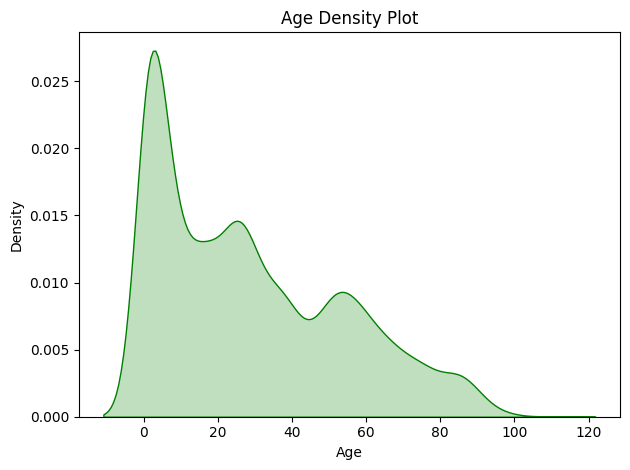

In [88]:
# Plot KDE (Kernel Density Estimate) for age distribution
sns.kdeplot(df_plot['age'], fill=True, color='green')

# Add chart title
plt.title("Age Density Plot")

# Label the x-axis
plt.xlabel("Age")

# Label the y-axis
plt.ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to the plots directory
plt.savefig("../plots/age-distribution-density.png")

# Display the plot
plt.show()


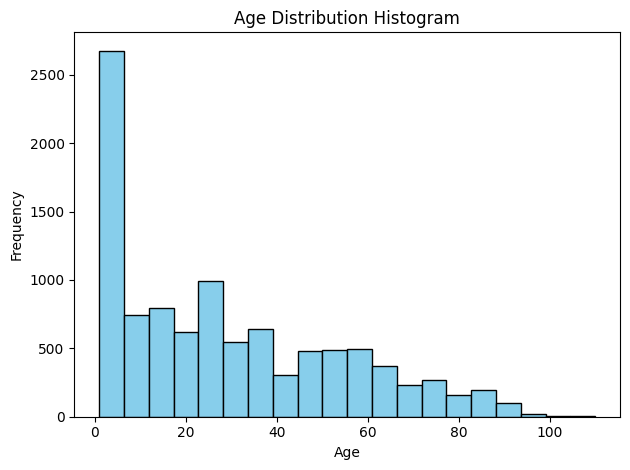

In [ ]:
# Histogram of age
plt.hist(df_plot['age'], bins=20, color='skyblue', edgecolor='black')

# Title and labels
plt.title("Age Distribution Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Layout and save
plt.tight_layout()
plt.savefig("../plots/age-distribution-histogram.png")

# Show plot
plt.show()


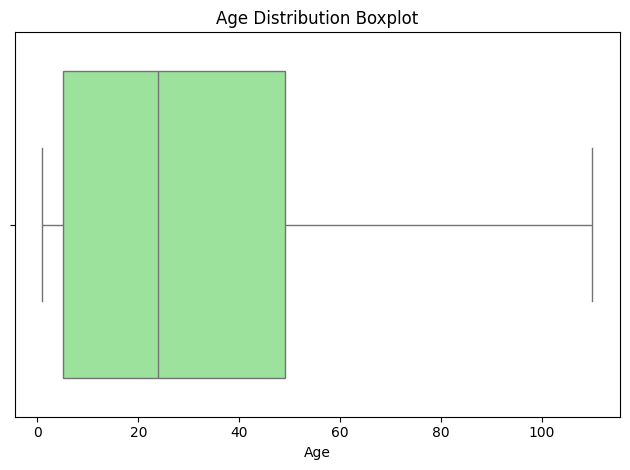

In [ ]:
# Boxplot of age
sns.boxplot(x=df_plot['age'], color='lightgreen')

# Title and label
plt.title("Age Distribution Boxplot")
plt.xlabel("Age")

# Layout and save
plt.tight_layout()
plt.savefig("../plots/age-distribution-boxplot.png")

# Show plot
plt.show()


## Age distribution by race and gender

- **Boxplot:** Spread, median, and outliers per race, split by gender.  
- **Histogram grid:** Detailed age distributions for each race–gender combination.  
- **Notes:** Labels mapped to readable strings for clarity in plots and margin titles.


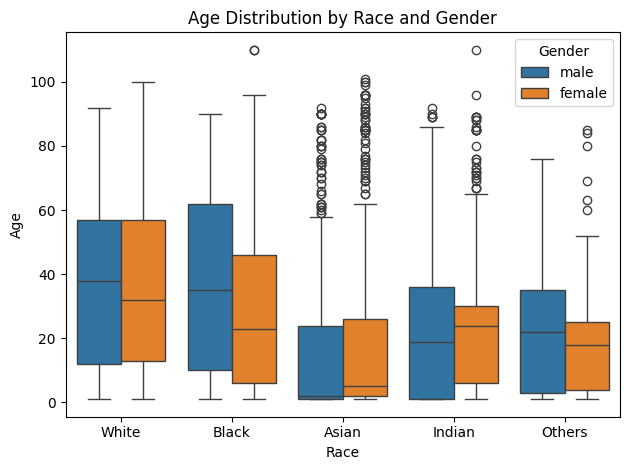

In [91]:
# Boxplot of age by race and gender
ax = sns.boxplot(x="race", y="age", hue="gender", data=df_plot)

# Title and axis labels
plt.title("Age Distribution by Race and Gender")
plt.xlabel("Race")
plt.ylabel("Age")

# Replace numeric tick labels with readable ones 
ax.set_xticks(range(len(RACE_LABEL)))
ax.set_xticklabels(RACE_LABEL)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, GENDER_LABEL, title="Gender")

# Layout and save
plt.tight_layout()
plt.savefig("../plots/age-distribution-by-race-gender-boxplot.png")

# Show plot
plt.show()


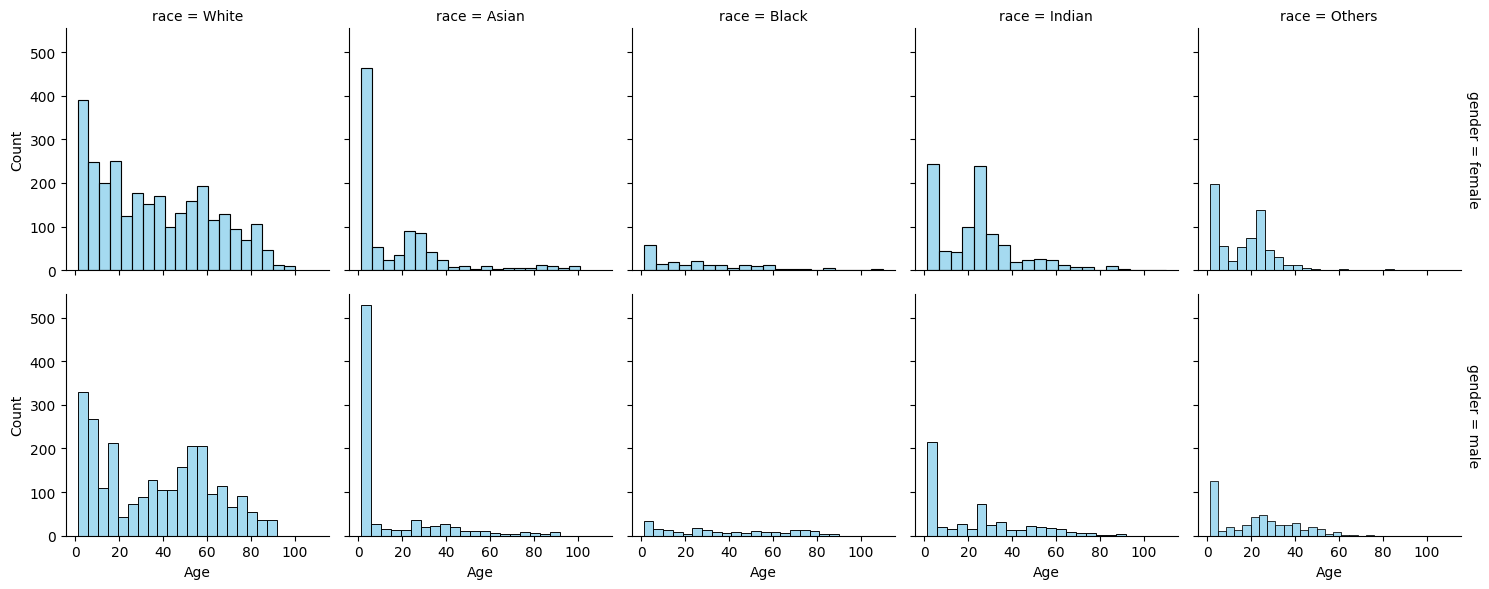

In [92]:
# Map numeric codes to readable labels
df_plot['race'] = df_plot['race'].map({i: label for i, label in enumerate(RACE_LABEL)})
df_plot['gender'] = df_plot['gender'].map({i: label for i, label in enumerate(GENDER_LABEL)})

# Create FacetGrid with readable labels
g = sns.FacetGrid(df_plot, col="race", row="gender", margin_titles=True)
g.map(sns.histplot, "age", bins=20, color="skyblue")
g.set_axis_labels("Age", "Count")

# Save and show
plt.tight_layout()
plt.savefig("../plots/age-distribution-by-race-gender-facetgrid.png")
plt.show()


---
##  Create a Small Independent Test Set

Creating test data from the dataset for when our model has achieved full learning for final testing

In [3]:
# Take 5 random samples from the dataframe with a fixed random seed
test_samples = df.sample(n=5, random_state=96)
test_samples2 = df.sample(n=5, random_state=64)

# Define a function to visualize and save the sampled images
def show_sample(test_samples: pd.DataFrame, name: str):
    # Create a figure with 1 row and 5 columns of subplots
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i, ax in enumerate(axes):
        # Select the i-th row from the sample
        row = test_samples.iloc[i]
        # Load the image from bytes
        img = Image.open(io.BytesIO(row["image"]["bytes"]))
        # Show the image on the subplot
        ax.imshow(img)
        # Set the title with age, gender, and race
        ax.set_title(f"A:{row['age']} G:{row['gender']} R:{row['race']}")
        # Hide axis ticks
        ax.axis("off")
    # Save the figure to the plots directory with the given name
    plt.savefig(f"../plots/{name}.png")
    # Display the figure
    plt.show()

# Call the function to display and save the first set of samples

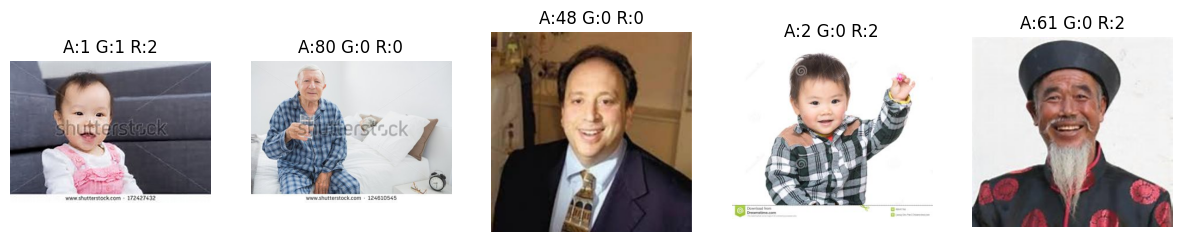

In [4]:
show_sample(test_samples, 'test_samples')

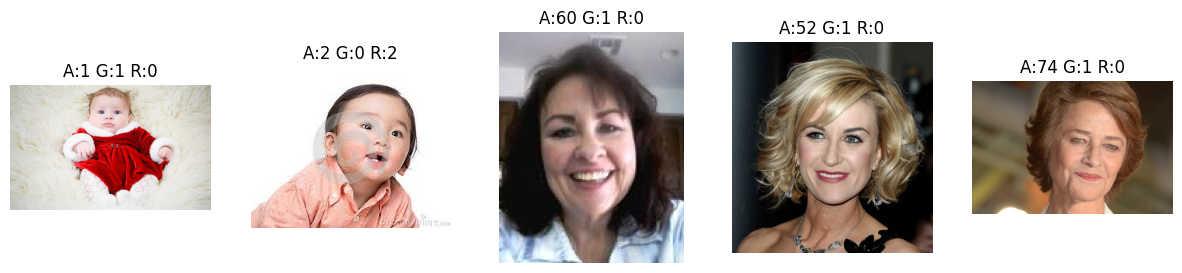

In [5]:
# Call the function to display and save the first set of samples
show_sample(test_samples2,'test_samples2')

In [ ]:
# We separate the test data from the dataframe so that it is not included in the training process.
df=df.drop(test_samples.index)
df=df.drop(test_samples2.index)